In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_regression
x,y = make_regression(n_samples=50,n_features=5)

In [6]:
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4
0,0.417874,0.527714,-1.656387,0.090953,-1.430773
1,-0.074476,-1.236527,-1.454632,-0.560509,1.817486
2,-0.020096,-0.174736,-0.825520,0.148798,1.235031
3,-0.403995,0.713575,-0.224689,1.193369,0.391963
4,-0.300380,1.327148,-2.142600,-1.197097,0.222305


In [7]:
y[:5]

array([-198.00628761,   -3.20526428,   64.56090075,   80.55843174,
       -191.33302073])

In [9]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

In [10]:
fs = SelectKBest(score_func=mutual_info_regression, k =3)
fs.fit(x,y)

SelectKBest(k=3, score_func=<function mutual_info_regression at 0x7e4413c70700>)

In [11]:
fs.scores_

array([0.        , 0.15467472, 0.        , 0.13961044, 0.15400951])

In [12]:
mutual_score = pd.Series(fs.scores_, index=x.columns)
mutual_score

0    0.000000
1    0.154675
2    0.000000
3    0.139610
4    0.154010
dtype: float64

<Axes: >

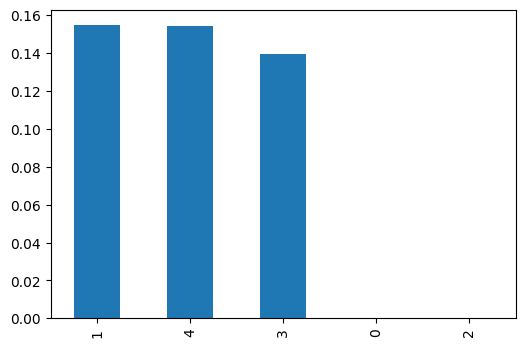

In [13]:
mutual_score.sort_values(ascending=False).plot.bar(figsize=(6,4))

In [15]:
x_sel = fs.fit_transform(x,y)
x_sel = pd.DataFrame(x_sel)
x_sel.head()

,0,1,2
0,0.527714,0.090953,-1.430773
1,-1.236527,-0.560509,1.817486
2,-0.174736,0.148798,1.235031
3,0.713575,1.193369,0.391963
4,1.327148,-1.197097,0.222305


# Classification problem

In [17]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif

In [18]:
x,y = make_classification(n_samples=50, n_features=5, n_informative=2)
x = pd.DataFrame(x)

In [19]:
x.head()

,0,1,2,3,4
0,0.755557,-1.206569,0.704797,1.192492,-0.044002
1,0.866581,-0.913846,-0.239696,1.471278,0.122284
2,-1.337238,0.899433,0.766825,-1.837994,-0.227162
3,0.690443,-0.928476,0.559644,0.904945,-0.037339
4,0.891725,0.153370,0.515014,-0.595625,-0.116039


In [20]:
y[:5]

array([1, 1, 0, 1, 0])

<Axes: >

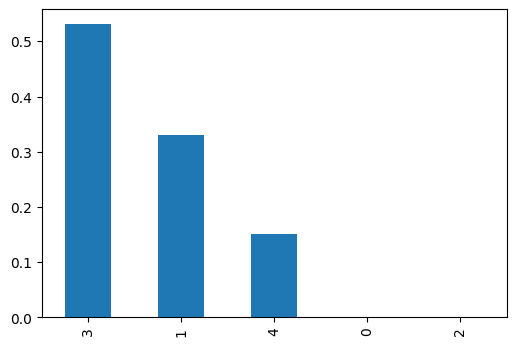

In [23]:
fs = SelectKBest(score_func=mutual_info_classif, k=3)
fs.fit(x,y)
mu_score = pd.Series(fs.scores_, index=x.columns)
mu_score.sort_values(ascending=False).plot.bar(figsize=(6,4))

In [24]:
x_sel = fs.fit_transform(x,y)
x_sel = pd.DataFrame(x_sel)
x_sel.head()

,0,1,2
0,-1.206569,1.192492,-0.044002
1,-0.913846,1.471278,0.122284
2,0.899433,-1.837994,-0.227162
3,-0.928476,0.904945,-0.037339
4,0.153370,-0.595625,-0.116039


## Unsupervise lerning

In [25]:
import pandas as pd

data = pd.DataFrame({'Math':[70,60,40,80,30],
                     'Chemistry':[60,80,65,55,60],
                     'Maths':[70,60,40,80,30],
                     'Physics':[50,50,50,50,50],
                     'General_Test':[70,70,60,60,80]})
print(data)

   Math  Chemistry  Maths  Physics  General_Test
0    70         60     70       50            70
1    60         80     60       50            70
2    40         65     40       50            60
3    80         55     80       50            60
4    30         60     30       50            80


**variance**

In [26]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0)
selected_features = selector.fit_transform(data)

In [29]:
data = pd.DataFrame(selected_features, columns=selector.get_feature_names_out())
data

,Math,Chemistry,Maths,General_Test
0,70,60,70,70
1,60,80,60,70
2,40,65,40,60
3,80,55,80,60
4,30,60,30,80


**Correlation**

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
cor = data.corr()
cor

,Math,Chemistry,Maths,General_Test
Math,1.000000,-0.150424,1.000000,-0.489932
Chemistry,-0.150424,1.000000,-0.150424,0.124274
Maths,1.000000,-0.150424,1.000000,-0.489932
General_Test,-0.489932,0.124274,-0.489932,1.000000


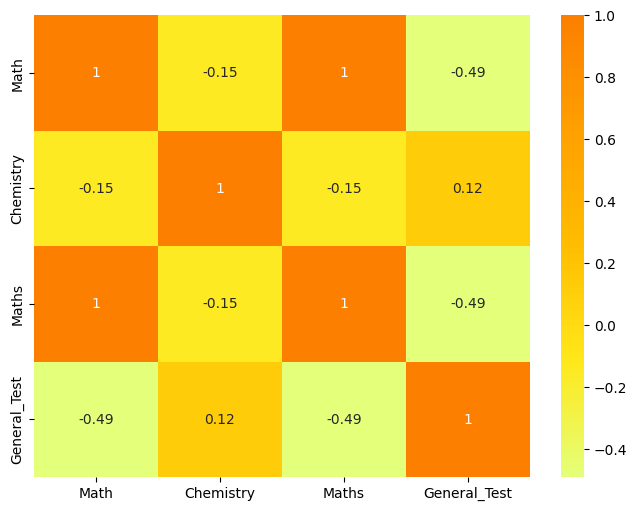

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(cor, annot=True, cmap='Wistia')
plt.show()

In [34]:
corr_features = set()
for i in range(len(cor.columns)):
  for j in range(i):
    if abs(cor.iloc[i,j]) > 0.9:
      colname = cor.columns[i]
      corr_features.add(colname)

In [35]:
corr_features

{'Maths'}

In [36]:
data = data.drop(corr_features, axis=1)

In [37]:
data

,Math,Chemistry,General_Test
0,70,60,70
1,60,80,70
2,40,65,60
3,80,55,60
4,30,60,80
